# To predict diabetes using PIMA diabetes data : EDA Part

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### About data

URL = https://www.kaggle.com/uciml/pima-indians-diabetes-database
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, 
Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
- Pregnancies : Number of times pregnant

- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- BloodPressure : Diastolic blood pressure (mm Hg)

- SkinThickness : Triceps skin fold thickness (mm)

- Insulin : 2-Hour serum insulin (mu U/ml)

- BMI : Body mass index (weight in kg/(height in m)^2)

- DiabetesPedigreeFunction : Diabetes pedigree function

- Age : Age (years)

- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 if non-diabetic, 1 if diabetic)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# just for Women
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
## No Null In First Observation But Let's Look At This Deep 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Age Outlier')

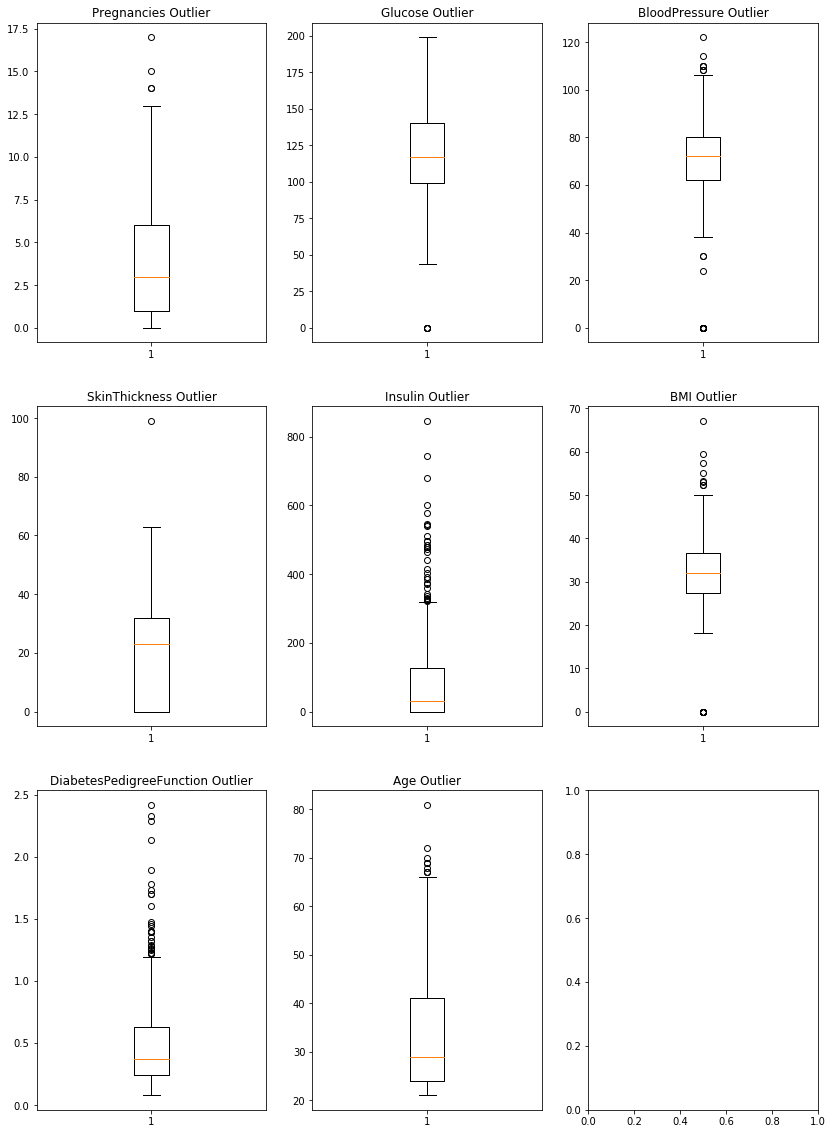

In [6]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')

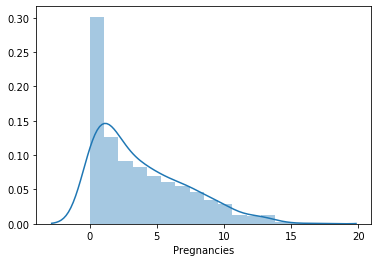

In [7]:
sns.distplot(df['Pregnancies'])

0.25:  1.0
0.75: 6.0
bottom: -6.5
ceiling: 13.5


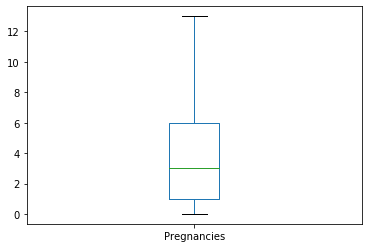

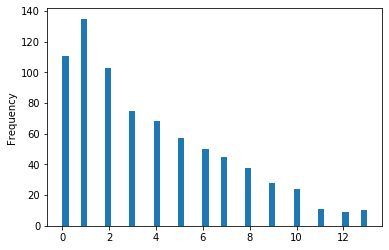

In [8]:
# print Just For Be Clear Underestanding
def detect_outlier(data):
    q1 = np.quantile(data, 0.25)
    print('0.25: ', q1)
    q3 = np.quantile(data, 0.75)
    print('0.75:', q3)
    iqr = q3 - q1 
    low = q1 - (1.5 * iqr)
    ## we does not care about minus values
    #if low <= 0:
    #    low = q1
    #else:
    #    pass
    print('bottom:', low)
    high = q3 + (1.5 * iqr)
    print('ceiling:', high)
    return high, low 

high, bottom = detect_outlier(df['Pregnancies'])
df  = df[(df['Pregnancies'] > bottom) & (df['Pregnancies'] < high)]
df['Pregnancies'].plot(kind='box')
plt.figure()
df['Pregnancies'].plot(kind='hist', bins=50)

0.25:  24.0
0.75: 40.25
bottom: -0.375
ceiling: 64.625


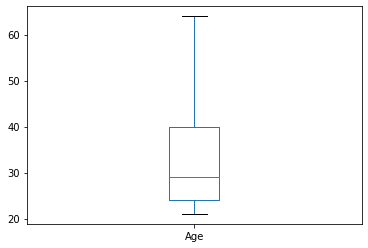

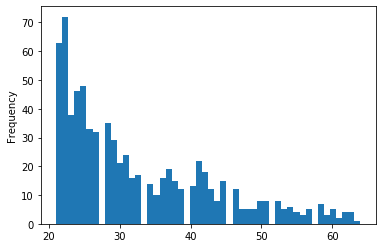

In [9]:
high, bottom = detect_outlier(df['Age'])
df  = df[(df['Age'] > bottom) & (df['Age'] < high)]
df['Age'].plot(kind='box')
plt.figure()
df['Age'].plot(kind='hist', bins=50)

0.25:  99.0
0.75: 139.25
bottom: 38.625
ceiling: 199.625


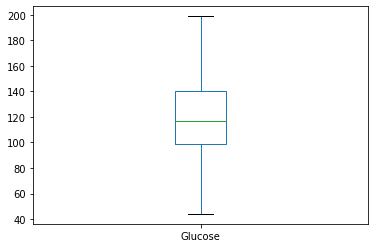

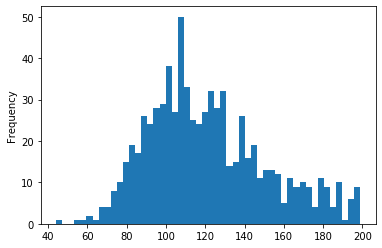

In [10]:
high, bottom = detect_outlier(df['Glucose'])
df  = df[(df['Glucose'] > bottom) & (df['Glucose'] < high)]
df['Glucose'].plot(kind='box')
plt.figure()
df['Glucose'].plot(kind='hist', bins=50)

0.25:  62.0
0.75: 80.0
bottom: 35.0
ceiling: 107.0


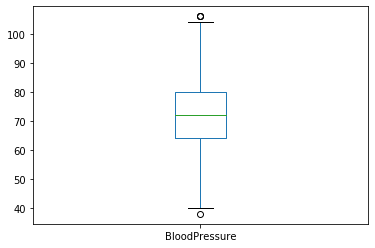

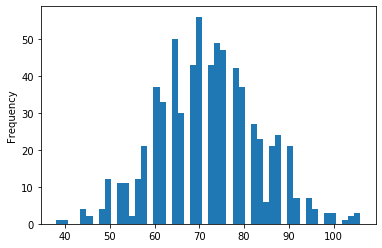

In [11]:
high, bottom = detect_outlier(df['BloodPressure'])
df  = df[(df['BloodPressure'] > bottom) & (df['BloodPressure'] < high)]
df['BloodPressure'].plot(kind='box')
plt.figure()
df['BloodPressure'].plot(kind='hist', bins=50)

Trustable_Mean: 52.93571428571428
0.25:  53.94
0.75: 135.0
bottom: -67.65
ceiling: 256.59000000000003


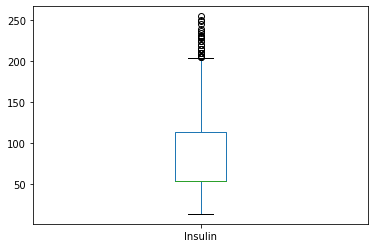

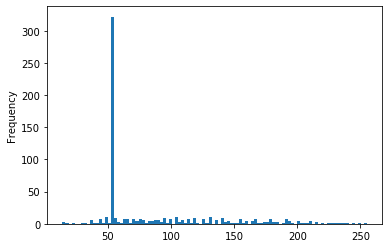

In [12]:
# If Look At the Bottom See Sime Negative Values But 0 Is Bigger
# Than Negative Value So In This Particular Way Delete It By Hand Like This :df['Insulin'].value_counts()
# If We Remove Zero We loss More information So Replace It By Trim_Mean
print('Trustable_Mean:', stats.trim_mean(df['Insulin'], 0.2))
df['Insulin'] = df['Insulin'].replace(0, 53.94)

high, bottom = detect_outlier(df['Insulin'])
df  = df[(df['Insulin'] > bottom) & (df['Insulin'] < high)]
df['Insulin'].plot(kind='box')
plt.figure()
df['Insulin'].plot(kind='hist', bins=100)

0.25:  27.3
0.75: 36.0
bottom: 14.250000000000002
ceiling: 49.05


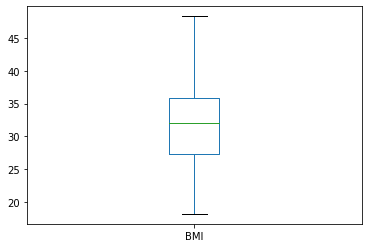

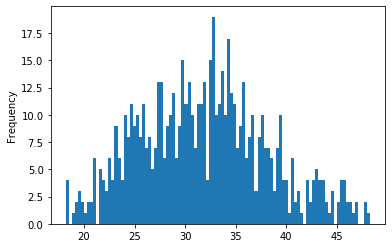

In [13]:
high, bottom = detect_outlier(df['BMI'])
df  = df[(df['BMI'] > bottom) & (df['BMI'] < high)]
df['BMI'].plot(kind='box')
plt.figure()
df['BMI'].plot(kind='hist', bins=100)

0.25:  0.245
0.75: 0.61275
bottom: -0.30662500000000004
ceiling: 1.1643750000000002


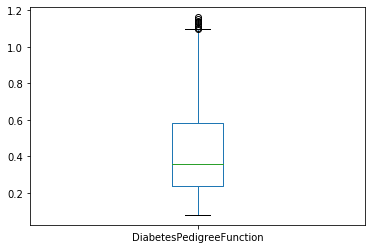

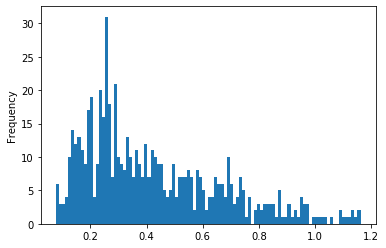

In [14]:
high, bottom = detect_outlier(df['DiabetesPedigreeFunction'])
df  = df[(df['DiabetesPedigreeFunction'] > bottom) & (df['DiabetesPedigreeFunction'] < high)]
df['DiabetesPedigreeFunction'].plot(kind='box')
plt.figure()
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=100)

Text(0.5, 1.0, 'Age Outlier')

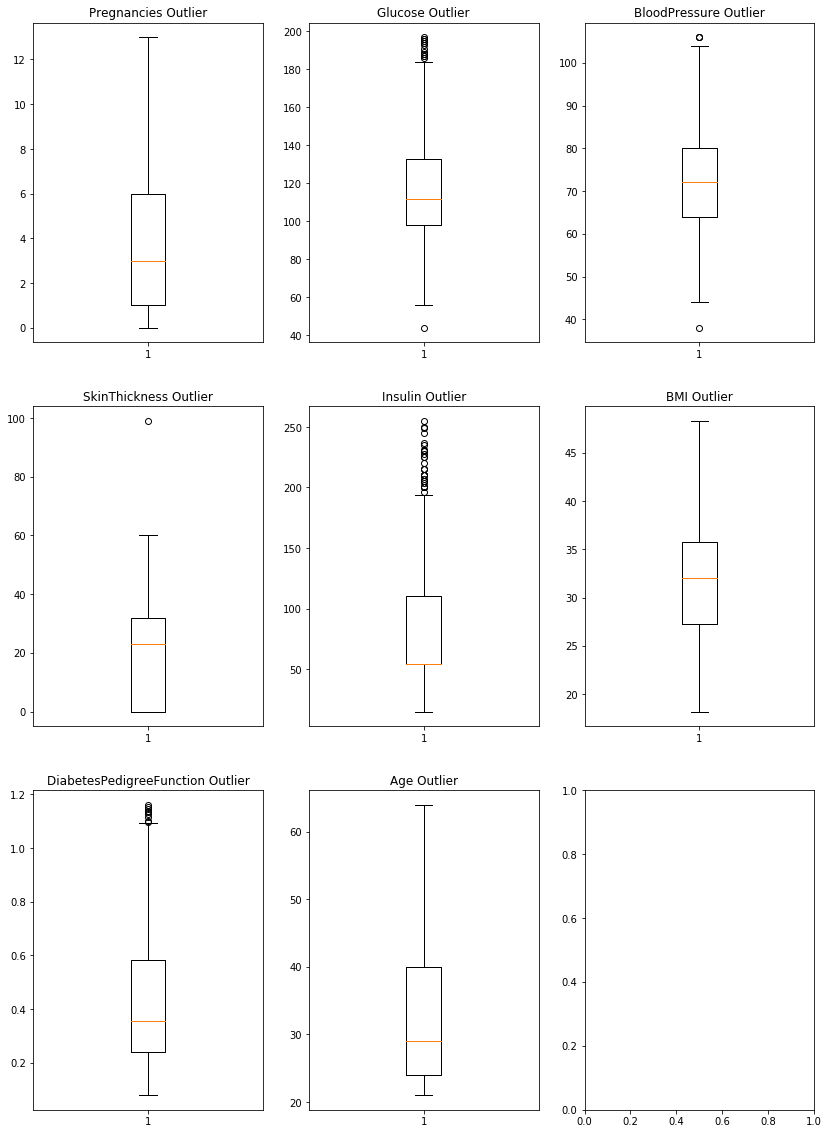

In [15]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')

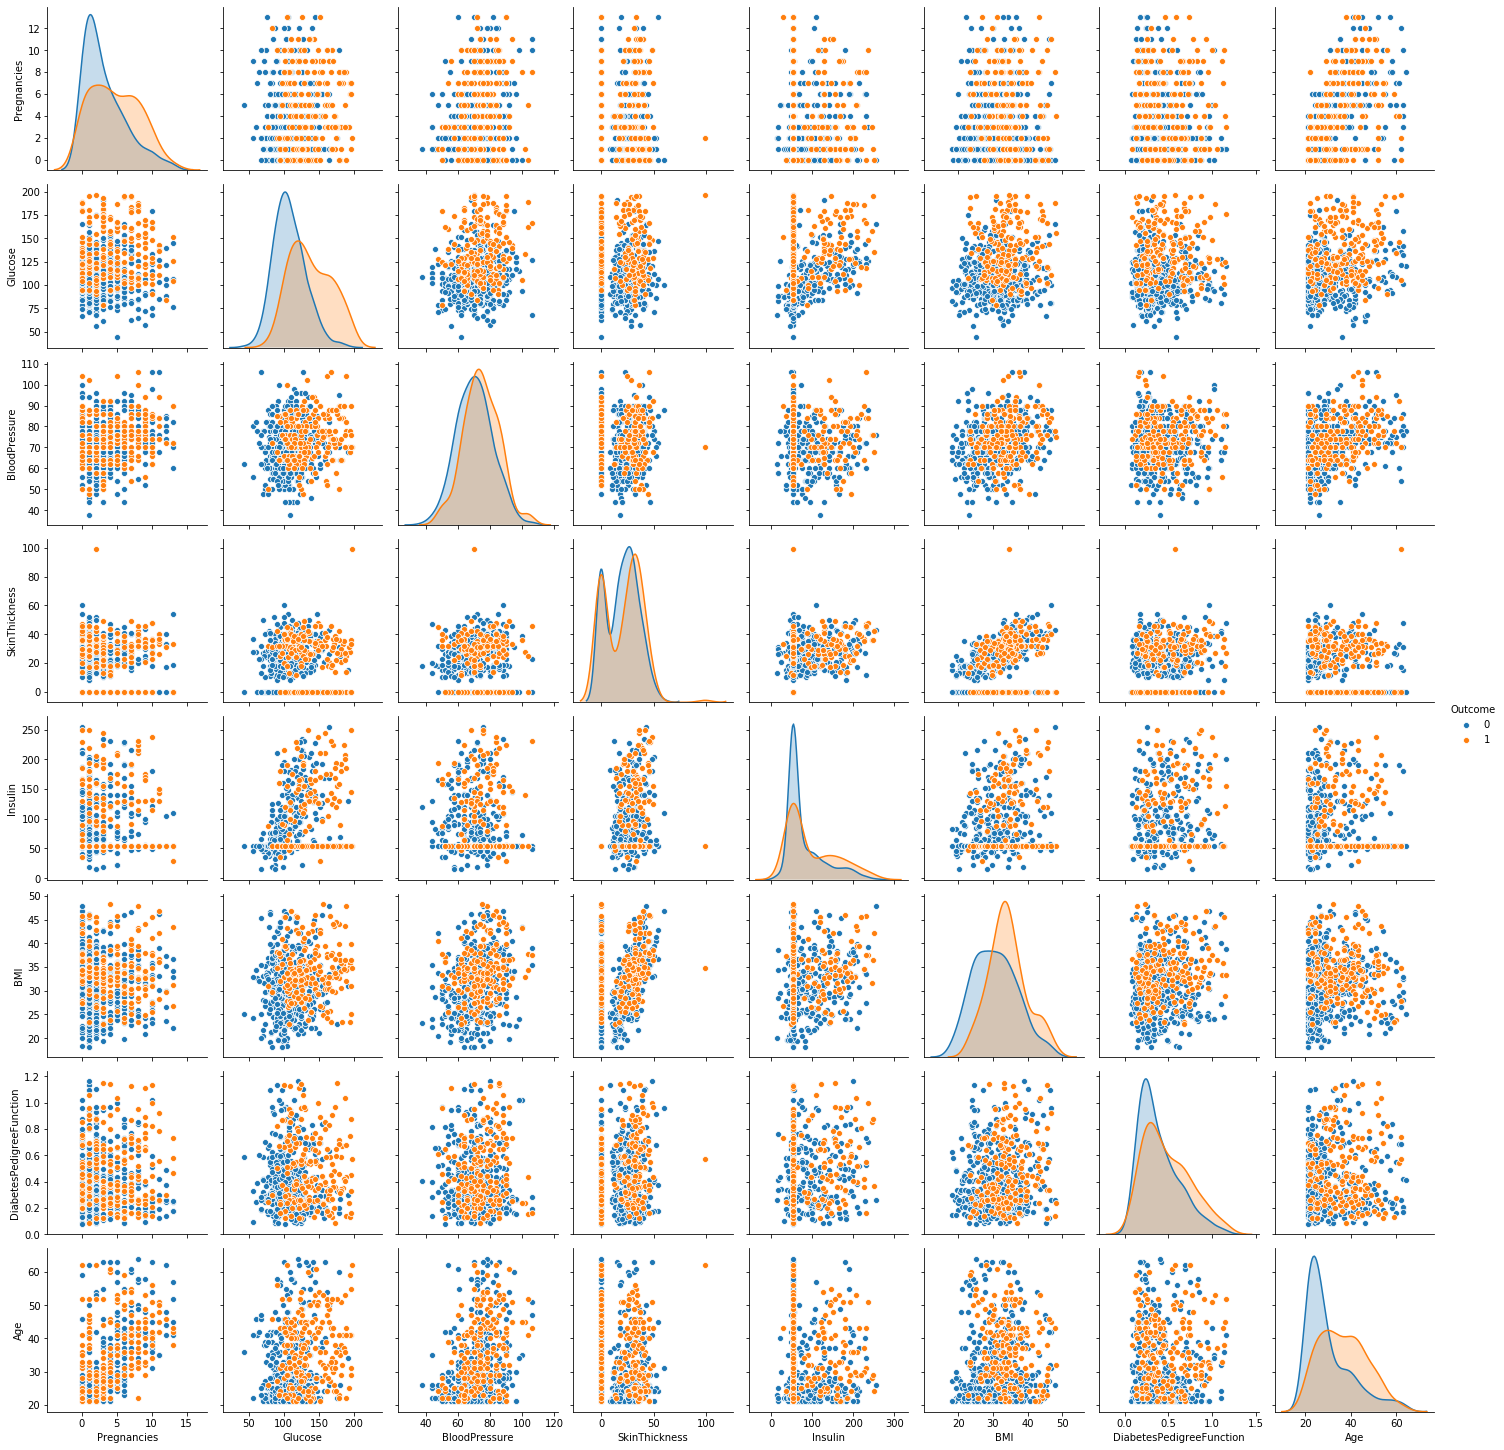

In [16]:
sns.pairplot(df, hue='Outcome')

method :pearson, kendal, spearman


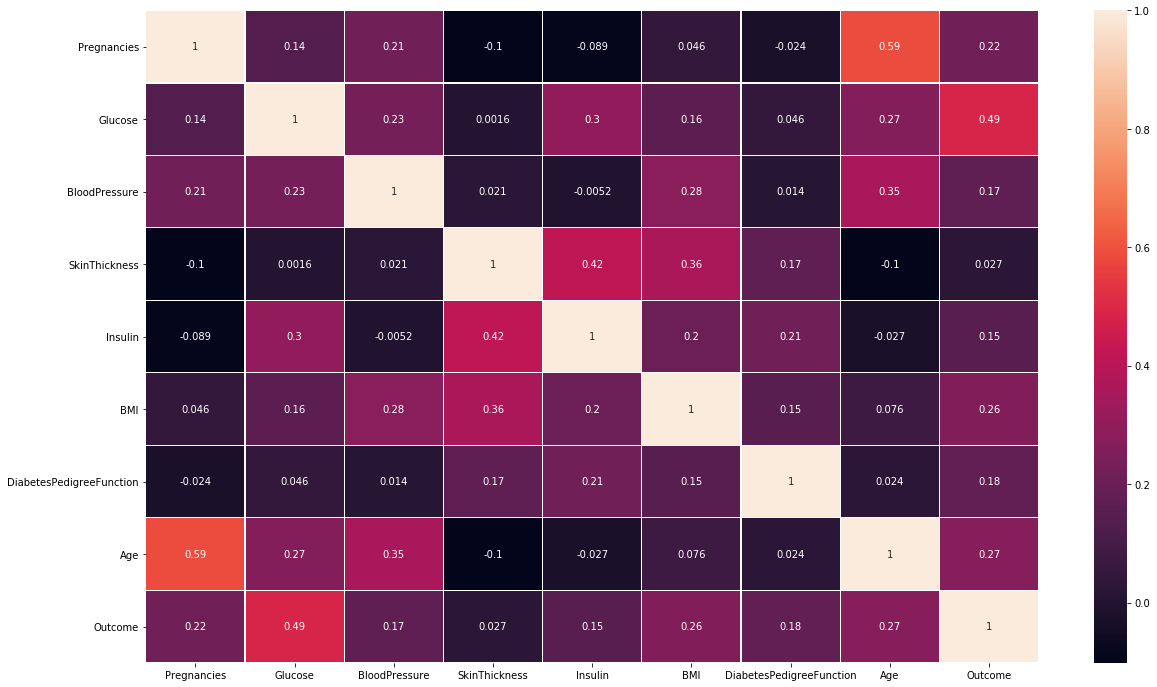

In [17]:
plt.figure(figsize=(20, 12))
print('method :pearson, kendal, spearman')
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.1)

In [20]:
df.to_csv("data/df_data.csv")